In [1]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos,exp
import matplotlib.pyplot as plt
from sympy import* 
import math
plt.style.use("ggplot")

In [2]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [3]:
h = 0.01
a = 0

In [4]:
f_prime = derivative(np.sin,a)
print(f_prime)

0.9999833334166665


In [5]:
f_0 = (np.sin(a + h) - np.sin(a-h))/(2*h)
print(f_0)

0.9999833334166665


In [6]:
fp1 = f_0 - f_prime
fp1

0.0

In [7]:
# x = np.linspace(0,10,1000)
# dx = x[1]-x[0]
# y = np.sin(x)
# dydx = np.gradient(y, 0)
# print(dydx)

In [8]:
def derivative(x,y,n):
    if(n==1):
        return np.gradient(y,x)
    else:
        return np.gradient(derivative(x,y,n-1),x)

Text(0.5, 1.0, 'function and derivative')

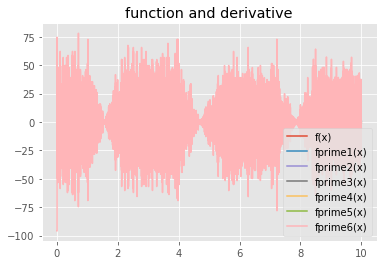

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(x,y,n):
    if(n==1):
        return np.gradient(y,x)
    else:
        return np.gradient(derivative(x,y,n-1),x)

a=0
b=10
N_points=10000

x=np.linspace(a,b,N_points, dtype=float)
y=np.cos(x, dtype=float)
plt.figure()
plt.plot(x,y,label="f(x)")

n_max=7
for n in range(1,n_max):
    yprime=derivative(x,y,n)
    yprime[0:n]=yprime[n]
    yprime[-n:]=yprime[-n-1]

    plt.plot(x,yprime,label=f"fprime{n}(x)")


plt.legend()
plt.title("function and derivative")

In [10]:
yprime=derivative(1,np.sin(x),3)
yprime

array([-5.00149655e-10, -7.50224107e-10, -1.00029756e-09, ...,
       -6.71758264e-08, -1.35402436e-07, -1.35612538e-07])

In [11]:
f_prime = (np.sin(a + h) - np.sin(a-h))/(2*h)
print(f_0)

0.9999833334166665


In [12]:
# f_prime = derivative(np.sin,a)
# print(f_prime)

In [13]:
import math
import matplotlib.pyplot as plt


### Global constants ###
x_0 = 0
f_0 = 100
k = 50

def f(x):
    '''Analytical solution to the diffeq: df/dx = -k*f'''
#     return f_0*math.exp(-k*x)
    return np.sin(x)

def analytical(func,x_end):
    '''Create arrays to plot analytical solution.'''
    xarr=[]
    farr=[]
    x=0
    while x < x_end:
        farr.append(func(x))
        xarr.append(x)
        x+=.001
    return xarr, farr

def forward(h,x_end):
    '''Create arrays to plot numerical solution using
    forward-differencing (explicit scheme).'''
    # plotting arrays with starting values
    xarr=[x_0]
    farr=[f_0]
    x=x_0
    # obtain points using forward differencing
    while x <= x_end:
        fnext=(1-h*k)*farr[-1]
        x+=h
        xarr.append(x)
        farr.append(fnext)
    return xarr, farr

def backward(h,x_end):
    '''Create arrays to plot numerical solution using
    backward-differencing (implicit scheme).'''
    # plotting arrays with starting values
    xarr=[x_0]
    farr=[f_0]
    x=x_0
    # obtain points using backward differencing
    while x <= x_end:
        fnext=farr[-1]/(1+h*k)
        x+=h
        xarr.append(x)
        farr.append(fnext)
    return xarr, farr

In [14]:
# x_array, f_array = analytical(f,.2)
# print(x_array)
# print(f_array)
# x1_array, f1_array = backward(.010,.15)
# print(x1_array)
# print(f1_array)

In [15]:
from scipy.misc import derivative
x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)

In [16]:
a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=3, order=5) / 2
a3 = derivative(f,0,dx=0.001,n=4, order = 5) / 6
# The parameter order specifies the number of points to use
# The value order must be odd and at least n + 1

print(a0,a1,a2,a3)

3.0 1.9999983891239026e-06 5.999976182557987 -1.5002813806101278


In [17]:
h_plus_2h = [1,2,4,8,16]
h_plus_h = [1,1,1,1,1]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1,-1,1]
h_minus_2h = [1,-2,4,-8,16]

h = np.vstack([h_plus_2h,h_minus_h,h1,h_minus_h,h_minus_2h])
h = np.transpose(h)
print(h)

dx = 0.001
b = np.array([0,0,(2/(dx**2)),0,0])

deriv = np.linalg.pinv(h)*b
print(deriv)

[[ 1  1  1  1  1]
 [ 2 -1  0 -1 -2]
 [ 4  1  0  1  4]
 [ 8 -1  0 -1 -8]
 [16  1  0  1 16]]
[[       0.               -0.            63725.49019608        0.
         0.        ]
 [       0.               -0.           666666.66666667        0.
        -0.        ]
 [       0.                0.         -1264705.88235294       -0.
         0.        ]
 [      -0.               -0.           666666.66666667        0.
        -0.        ]
 [      -0.                0.          -132352.94117647       -0.
         0.        ]]


In [18]:
a = np.matrix([[1,1,1,1],[-1,0,1,2],[0.5,0,0.5,2],[-1/6,0,1/6,8/6]])
b = np.matrix([[0,1,0,0]])
c = np.linalg.pinv(a)*b.T
print(c)

[[-0.33333333]
 [-0.5       ]
 [ 1.        ]
 [-0.16666667]]


In [19]:
h_plus_2h = [1,2,8/6,8,16/24]
h_plus_h = [1,1,1/2,1/6,1/24]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1/2,-1/6,1/24]
h_minus_2h = [1,-2,1/4,-8/6,16/24]

h = np.vstack([h_plus_2h,h_minus_h,h1,h_minus_h,h_minus_2h])
h = np.transpose(h)
print(h)

dx = 0.001
b = np.array([0,0,1,0,0])

deriv = np.linalg.pinv(h)*b.T
print(deriv)

[[ 1.          1.          1.          1.          1.        ]
 [ 2.         -1.          0.         -1.         -2.        ]
 [ 1.33333333  0.5         0.          0.5         0.25      ]
 [ 8.         -0.16666667  0.         -0.16666667 -1.33333333]
 [ 0.66666667  0.04166667  0.          0.04166667  0.66666667]]
[[ 0.         -0.         -0.04076708  0.          0.        ]
 [-0.         -0.          0.67004688  0.         -0.        ]
 [ 0.          0.         -0.74259053 -0.          0.        ]
 [ 0.         -0.          0.67004688  0.         -0.        ]
 [-0.         -0.         -0.55673616  0.          0.        ]]


In [20]:
np.sum(deriv[:,1])

0.0

In [21]:
h = 1
x = sy.Symbol('x')
A = np.matrix([[1,1,1],[1,0,-1],[1,0,1]])
print(A)
b = np.array([[0,0,2/x**2]])
c = np.linalg.pinv(A)*b.T
print(c)

[[ 1  1  1]
 [ 1  0 -1]
 [ 1  0  1]]
[[1.0/x**2]
 [-2.0/x**2]
 [1.0/x**2]]


In [22]:
h = 0.001
x = sy.Symbol('x')
func = np.array([sin(x),sin(0),sin(-x)])
print(func)
deriv = np.matmul(func,c/h)
print(deriv)

[sin(x) 0 -sin(x)]
[[2.27373675443232e-13*sin(x)/x**2]]


In [23]:
h = 1
# x = sy.Symbol('x')
A = np.matrix([[1,1,1],[1,0,-1],[1,0,1]])
print(A)
b = np.array([[0,0,2/h**2]])
c = np.linalg.pinv(A)*b.T
print(c)

[[ 1  1  1]
 [ 1  0 -1]
 [ 1  0  1]]
[[ 1.]
 [-2.]
 [ 1.]]


In [24]:
h = 0.001
# x = sy.Symbol('x')
func = np.array([np.sin(h),np.sin(0),np.sin(-h)])
print(func)
deriv = np.matmul(func,c/h)
print(deriv)

[ 0.001  0.    -0.001]
[[3.33066907e-16]]


In [25]:
h = 1
# x = sy.Symbol('x')
A = np.matrix([[1,1,1],[1,0,-1],[1,0,1]])
print(A)
b = np.array([[0,0,1]])
c = np.linalg.pinv(A)*b.T
print(c)

[[ 1  1  1]
 [ 1  0 -1]
 [ 1  0  1]]
[[ 0.5]
 [-1. ]
 [ 0.5]]


In [26]:
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)

In [27]:
y = f(0)
print(y)

3.0


In [28]:
h = 0.001
# x = sy.Symbol('x')
func = np.array([f(h),f(0),f(-h)])
print(func)
deriv = np.matmul(func,c/(h**2))
print(deriv)

[2.9999985 3.        2.9999985]
[[-1.50000038]]


In [29]:
h_plus_2h = [1,2,4,8,16]
h_plus_h = [1,1,1,1,1]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1,-1,1]
h_minus_2h = [1,-2,4,-8,16]

h = np.vstack([h_plus_2h,h_minus_h,h1,h_minus_h,h_minus_2h])
h = np.transpose(h)
print(h)

dx = 1
b = np.array([0,0,1,0,0])

deriv = np.linalg.pinv(h)*b.T
print(deriv)

[[ 1  1  1  1  1]
 [ 2 -1  0 -1 -2]
 [ 4  1  0  1  4]
 [ 8 -1  0 -1 -8]
 [16  1  0  1 16]]
[[ 0.         -0.          0.03186275  0.          0.        ]
 [ 0.         -0.          0.33333333  0.         -0.        ]
 [ 0.          0.         -0.63235294 -0.          0.        ]
 [-0.         -0.          0.33333333  0.         -0.        ]
 [-0.          0.         -0.06617647 -0.          0.        ]]


In [30]:
deriv = np.linalg.pinv(h)*b.T
deriv = deriv.T
print(deriv)
h = 0.001
# x = sy.Symbol('x')
func = np.array([f(2*h),f(h),f(0),f(-h), f(-2*h)])
print(func)
deriv = np.matmul(func,deriv*2/(h**2))
print(deriv)
np.sum(deriv)

[[ 0.          0.          0.         -0.         -0.        ]
 [-0.         -0.          0.         -0.          0.        ]
 [ 0.03186275  0.33333333 -0.63235294  0.33333333 -0.06617647]
 [ 0.          0.         -0.          0.         -0.        ]
 [ 0.         -0.          0.         -0.          0.        ]]
[2.99999402 2.9999985  3.         2.9999985  2.99999398]
[  191176.47058824  2000000.         -3794117.64705882  2000000.
  -397058.82352941]


-4.656612873077393e-10

In [31]:
h = 1
# x = sy.Symbol('x')
# A = np.matrix([[1,1,1,1,1],[2,1,0,-1,-2],[1,0,1]])
print(A)
# b = np.array([[0,0,1]])
# c = np.linalg.pinv(A)*b.T

[[ 1  1  1]
 [ 1  0 -1]
 [ 1  0  1]]


In [32]:
h_plus_2h = [1,2,4,8,16]
h_plus_h = [1,1,1,1,1]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1,-1,1]
h_minus_2h = [1,-2,4,-8,16]

h = np.vstack([h_plus_2h,h_minus_h,h1,h_minus_h,h_minus_2h])
h = np.transpose(h)

b = np.array([[0,0,1,0,0]])
c = np.linalg.pinv(h)*b.T
d = c[2,:]
print(d)

[ 1.          0.61764706 -0.63235294 -0.15441176  0.09558824]


In [33]:
h = 0.01
# x = sy.Symbol('x')
func = np.array([f(2*h),f(h),f(0),f(-h),(f(-2*h))])
print(func)
deriv = np.matmul(func.T,d)
print(deriv)
# print(np.sum(func)/6)
np_sum = np.sum(func)
np_sum/6

[2.99941594 2.999852   3.         2.999848   2.99938395]
2.7787008690891337


2.499749978792868

In [34]:
h_plus_2h = [1,2,8/6,8,16/24]
h_plus_h = [1,1,1/2,1/6,1/24]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1/2,-1/6,1/24]
h_minus_2h = [1,-2,1/4,-8/6,16/24]

h = np.vstack([h_plus_2h,h_minus_h,h1,h_minus_h,h_minus_2h])
h = np.transpose(h)
print(h)
print(np.matrix(h))

dx = 0.001
b = np.array([0,0,1,0,0])

deriv = np.linalg.pinv(h)*b
print(deriv)

[[ 1.          1.          1.          1.          1.        ]
 [ 2.         -1.          0.         -1.         -2.        ]
 [ 1.33333333  0.5         0.          0.5         0.25      ]
 [ 8.         -0.16666667  0.         -0.16666667 -1.33333333]
 [ 0.66666667  0.04166667  0.          0.04166667  0.66666667]]
[[ 1.          1.          1.          1.          1.        ]
 [ 2.         -1.          0.         -1.         -2.        ]
 [ 1.33333333  0.5         0.          0.5         0.25      ]
 [ 8.         -0.16666667  0.         -0.16666667 -1.33333333]
 [ 0.66666667  0.04166667  0.          0.04166667  0.66666667]]
[[ 0.         -0.         -0.04076708  0.          0.        ]
 [-0.         -0.          0.67004688  0.         -0.        ]
 [ 0.          0.         -0.74259053 -0.          0.        ]
 [ 0.         -0.          0.67004688  0.         -0.        ]
 [-0.         -0.         -0.55673616  0.          0.        ]]


In [35]:
h = 0.001
# x = sy.Symbol('x')
func = np.array([f(2*h),f(h),f(0),f(-h),(f(-2*h))])
print(func)
deriv = np.matmul(func,deriv.T)
print(deriv)
print(np.sum(deriv))

[2.99999402 2.9999985  3.         2.9999985  2.99999398]
[-0.12230123  2.01014065 -2.2277716   2.01014065 -1.67020847]
-1.7763568394002505e-15


In [36]:
h = 1
# x = sy.Symbol('x')
A = np.matrix([[1,1,1,1,1],[2,1,0,-1,-2],[4,1,0,1,4],[8,1,0,-1,-8],[16,1,0,1,16]])
print(A)
b = np.array([[0,0,0,1,0]])
c = np.linalg.pinv(A)*b.T
print(c)

[[ 1  1  1  1  1]
 [ 2  1  0 -1 -2]
 [ 4  1  0  1  4]
 [ 8  1  0 -1 -8]
 [16  1  0  1 16]]
[[ 8.33333333e-02]
 [-1.66666667e-01]
 [-4.12354978e-16]
 [ 1.66666667e-01]
 [-8.33333333e-02]]


In [37]:
h = 0.001
# x = sy.Symbol('x')
func = np.array([f(2*h),f(h),f(0),f(-h),(f(-2*h))])
print(func)
deriv = np.matmul(func,c/h**3)
print(deriv)
print(np.sum(deriv))

[2.99999402 2.9999985  3.         2.9999985  2.99999398]
[[1.99999207]]
1.9999920725822449


In [38]:
# h_plus_2h = np.array([1,2,8/6,8,16/24])
# h_plus_h = np.array([1,1,1/2,1/6,1/24])
# h1 = np.array([1,0,0,0,0])
# h_minus_h = np.array([1,-1,1/2,-1/6,1/24])
# h_minus_2h = np.array([1,-2,1/4,-8/6,16/24])

h_plus_2h = [1,2,4,8,16]
h_plus_h = [1,1,1,1,1]
h1 = [1,0,0,0,0]
h_minus_h = [1,-1,1,-1,1]
h_minus_2h = [1,-2,4,-8,16]
h_list = np.vstack([h_plus_2h,h_plus_h,h1,h_minus_h])
h_list = np.vstack([h_list,h_minus_2h])

h_mat = np.matrix(h_list)
# h_mat.append(h_minus_2h)
print(h_mat)
print(h_mat.T)

b = np.array([[0,0,0,1,0]])
c = np.linalg.pinv(h_mat.T)*b.T
print(c)

[[ 1  2  4  8 16]
 [ 1  1  1  1  1]
 [ 1  0  0  0  0]
 [ 1 -1  1 -1  1]
 [ 1 -2  4 -8 16]]
[[ 1  1  1  1  1]
 [ 2  1  0 -1 -2]
 [ 4  1  0  1  4]
 [ 8  1  0 -1 -8]
 [16  1  0  1 16]]
[[ 8.33333333e-02]
 [-1.66666667e-01]
 [-4.12354978e-16]
 [ 1.66666667e-01]
 [-8.33333333e-02]]


In [39]:
h = 0.001
# x = sy.Symbol('x')
func = np.array([f(2*h),f(h),f(0),f(-h),(f(-2*h))])
print(func)
deriv = np.matmul(func,c/h**3)
print(deriv)
print(np.sum(deriv))

[2.99999402 2.9999985  3.         2.9999985  2.99999398]
[[1.99999207]]
1.9999920725822449


In [40]:
# Order
n = 5
# Create list of zeros
mat_list = np.matrix(np.zeros((n,n)))
print(mat_list)
m = floor(n/2)
print(m)
# First half
print(n)
for i in range(m):
#     print(i)
    for j in range(n):
        mat_list[j,i] = ((m-i)**j)

# Middle function
mat_list[0,m] = 1

# Second half
for i in range(m+1):
    print(i)
    for j in range(n):
        mat_list[j,i*1 + m] = ((i)**j)*(-1)**j
        
print(mat_list)
    

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
2
5
0
1
2
[[ 1.  1.  1.  1.  1.]
 [ 2.  1.  0. -1. -2.]
 [ 4.  1.  0.  1.  4.]
 [ 8.  1.  0. -1. -8.]
 [16.  1.  0.  1. 16.]]


In [41]:
# derivative index
# b = np.array([[0,0,0,1,0]])
b = np.array([[1,0,0,0,0]])
c = np.linalg.pinv(mat_list)*b.T
print(c)

[[ 1.01789570e-17]
 [ 4.38170136e-17]
 [ 1.00000000e+00]
 [ 3.14206204e-16]
 [-6.07482801e-17]]


In [42]:
# Create solution vector
# Step size
h = 0.001
# Create 2 "Halves"
first_half = []
second_half = []
for i in reversed(range(m)):
    first_half.append(f((i+1)*h))
for i in range(m):
    second_half.append(f((-i-1)*h))   
# Create complete solution vector
# func = np.concatenate((first_half,f(0),second_half), axis=None)
func = np.hstack((first_half,f(0),second_half))
print(func)

[2.99999402 2.9999985  3.         2.9999985  2.99999398]


In [43]:
h = 0.001
# x = sy.Symbol('x')
# func = np.array([f(2*h),f(h),f(0),f(-h),(f(-2*h))])
# print(func)
deriv = np.matmul(func,c/h**0)
print(deriv)

[[3.]]


In [44]:
def derivation(f,x,h,n,term):
    
    # Ensure polynomials are odd
    if n%2 == 0:
        n += 1
        
    # Term,
    if term <= 0:
        term = 1
    
    # Create matrix of Taylor Series  equations
    
    # Create list of zeros
    mat_list = np.matrix(np.zeros((n,n)))
    print(mat_list)
    m = floor(n/2)
    print(m)
    # First half
    print(n)
    for i in range(m+1):
    #     print(i)
        for j in range(n):
            mat_list[j,i] = ((m-i)**j)
            mat_list[j,i + m] = ((i)**j)*(-1)**j

    # Middle function
    mat_list[0,m] = 1
    print(mat_list)

    # Second half
#     for i in range(m+1):
#         print(i)
#         for j in range(n):
#             mat_list[j,i*1 + m] = ((i)**j)*(-1)**j
            
    # Index
    b = np.zeros((1,n))
    b[0][term-1] = 1
    print(b)
    # Weights
    c = np.linalg.pinv(mat_list)*b.T
#     print(c)

    # Create solution vector
    # Step size
    h = 0.001
    # Create 2 "Halves"
    first_half = []
    second_half = []
    for i in reversed(range(m)):
        first_half.append(f((i+1)*h))
    for i in range(m):
        second_half.append(f((-i-1)*h))   
    # Create complete solution vector
    # func = np.concatenate((first_half,f(0),second_half), axis=None)
    func = np.hstack((first_half,f(0),second_half))
    
    deriv = np.matmul(func,c/h**(term-1))
#     deriv = deriv[0][0]
    
    return np.array(deriv)[0][0]

In [45]:
x = 0
h = 0.001
n = 7
term = 4
c = derivation(f,x,h,n,term)
print(c)

terms_list = []
for i in range(term):
    c = derivation(f,x,h,n,i)
    terms_list.append(c)
    
print(terms_list)
    

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.    1.   64.  729.]]
[[0. 0. 0. 1. 0. 0. 0.]]
1.999996304512024
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.

In [46]:
from scipy.misc import derivative
x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)
a4 = derivative(f,0,dx=0.001,n=4,order=5) / math.factorial(4)
print(a4)

-0.37507034515253196


In [47]:
# x = 0
# h = 0.001
# n = 5
# # if n%2 == 0:
# #     n += 1
# # print(n)
# term = 3
# c = derivation(f,x,h,n,term)
# print(c)
# # print(type(c))

In [48]:
# for i in np.array(c):
#     print(i[0])

In [49]:
x = 0
h = 0.001
n = 7
# if n%2 == 0:
#     n += 1
# print(n)
f = lambda x: np.exp(x)
term = 5
terms_list = []
for t in range(1,term):
    c = derivation(f,x,h,n,t)
    terms_list.append(c)
print(terms_list)
    
integral_list = []
for i in range(1,term):
    c = derivation(f,x,h,n,i)
    print("I:",i)
    print("init: ", c)
    integral_list.append(c/(i*2-1))
# print(integral_list)
    
#     print(c)
# print(type(c))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.    1.   64.  729.]]
[[1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.    1.   64.  729.

In [50]:
print(terms_list)
print(integral_list)

[1.0000000000000007, 1.0000000000011369, 0.5000000011641532, 0.16666549444198608]
[1.0000000000000007, 0.3333333333337123, 0.10000000023283065, 0.023809356348855153]


In [51]:
x = 0
h = 0.001
n = 7
# if n%2 == 0:
#     n += 1
# print(n)
f = lambda x: np.exp(x)
term = 5
terms_list = []
for t in range(1,term):
    c = derivation(f,x,h,n,t)
    terms_list.append(c)
print(terms_list)
    
integral_list = []
for i in range(1,term):
    c = derivation(f,x,h,n,i)
    print("I:",i)
    print("init: ", c)
    integral_list.append(c/(i*2-1))
# print(integral_list)
    
#     print(c)
# print(type(c))

dy_dx = []
I = []
for i in range(1,term):
    c = derivation(f,x,h,n,i)
    I.append(i)
    print("I:",i)
    print("init: ", c)
    dy_dx.append(c*(2*i-2))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.    1.   64.  729.]]
[[1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
3
7
[[   1.    1.    1.    1.    1.    1.    1.]
 [   3.    2.    1.    0.   -1.   -2.   -3.]
 [   9.    4.    1.    0.    1.    4.    9.]
 [  27.    8.    1.    0.   -1.   -8.  -27.]
 [  81.   16.    1.    0.    1.   16.   81.]
 [ 243.   32.    1.    0.   -1.  -32. -243.]
 [ 729.   64.    1.    0.    1.   64.  729.

In [52]:
print(terms_list)
print(dy_dx)
print(I)

[1.0000000000000007, 1.0000000000011369, 0.5000000011641532, 0.16666549444198608]
[0.0, 2.0000000000022737, 2.000000004656613, 0.9999929666519165]
[1, 2, 3, 4]
